# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set() 

In [144]:
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [145]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [146]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [147]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [148]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [149]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [150]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [151]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [152]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [153]:
dataset.tail()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1372316,2017-12-31,22,Domingo,Provincia,Pesado,8
1372319,2017-12-31,23,Domingo,Provincia,Liviano,8
1372320,2017-12-31,23,Domingo,Provincia,Liviano,148
1372324,2017-12-31,23,Domingo,Provincia,Pesado,1
1372326,2017-12-31,23,Domingo,Provincia,Pesado,1


In [154]:
dataset #238869 rows × 6 columns

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769
...,...,...,...,...,...,...
1372316,2017-12-31,22,Domingo,Provincia,Pesado,8
1372319,2017-12-31,23,Domingo,Provincia,Liviano,8
1372320,2017-12-31,23,Domingo,Provincia,Liviano,148
1372324,2017-12-31,23,Domingo,Provincia,Pesado,1


In [155]:
# Analizamos si hay valores faltantes
dataset.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


In [156]:
#No hay valores faltantes, por lo que no vamos a realizar la imputación de valores Faltantes.
dataset.isnull().sum()

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
dtype: int64

In [157]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [158]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [159]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


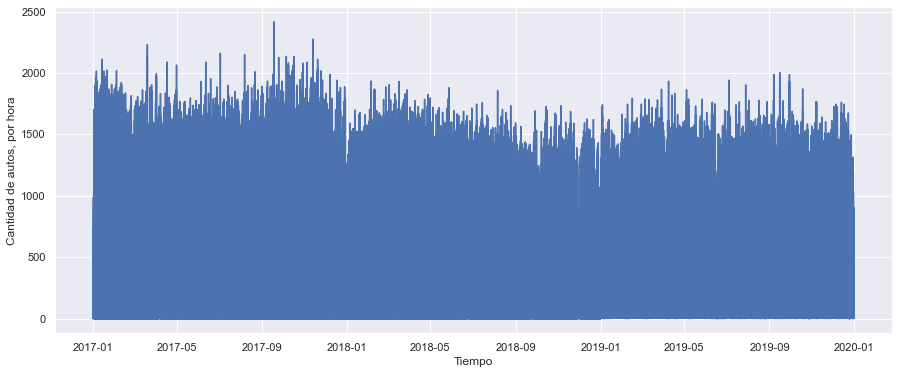

In [160]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [161]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


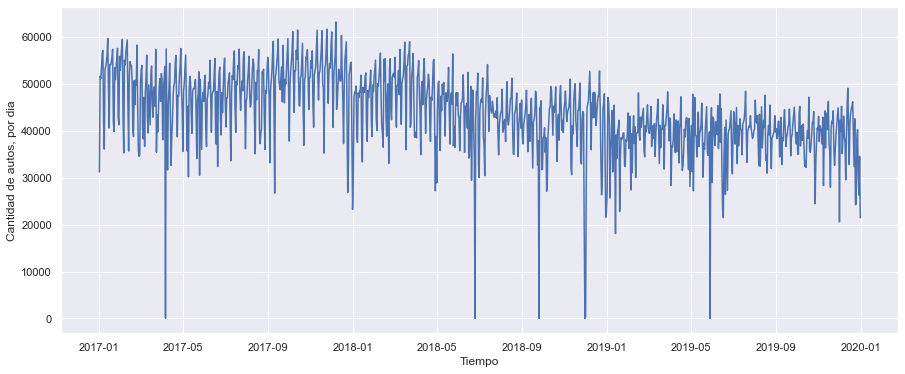

In [162]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [165]:
#Gracias a la mejor visualización de los datos, podemos notar a simple vista que hay valores atípicos
#Ahora graficamos por año para poder visualizar mejor esos valores atípicos

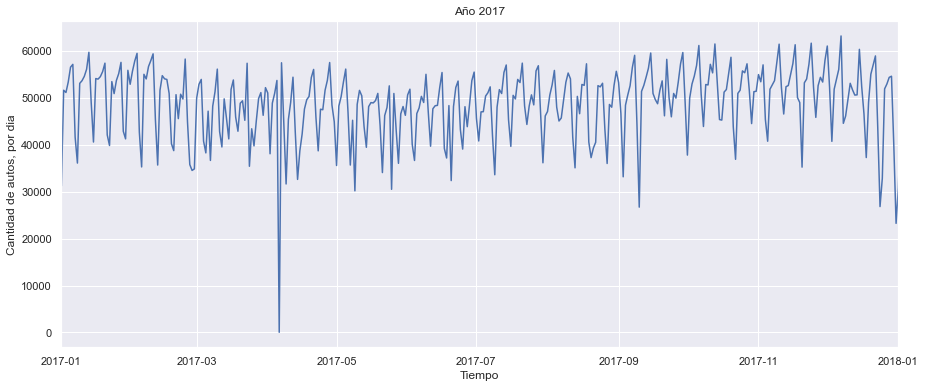

In [166]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2017')
plt.show()
#Podemos analizar que el valor atípico en 2017 es la fecha:
# 06/04/2017: paro general de la CGT

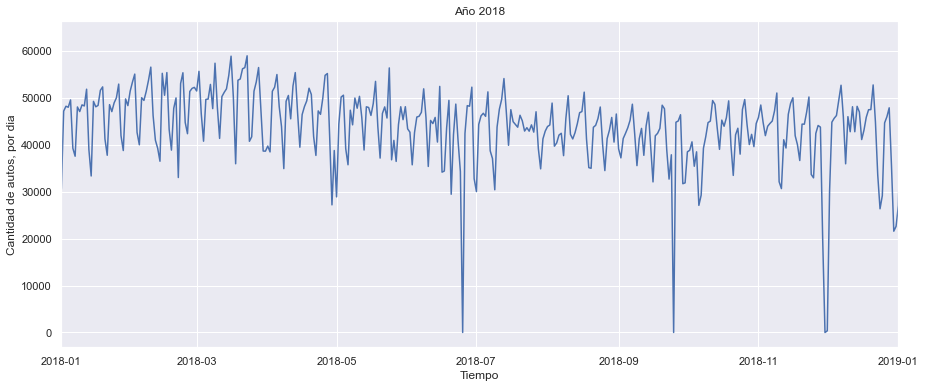

In [167]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2018')
plt.show()
#En 2018 podemos visualizar 3 valores atípicos en las fechas:
# - 25/06/2018 : La CGT convocó la huelga el lunes (25.06.2018) después de que fracasaran distintas negociación con el Gobierno.
# - 25/09/2018 : La CGT, con la adhesión de las tres CTA y movimientos sociales, realiza paro general contra el gobierno.
# - Del 29/11 al 01/12 : feriado establecido por el Gobierno, con motivo de la Cumbre de Líderes del G-20.

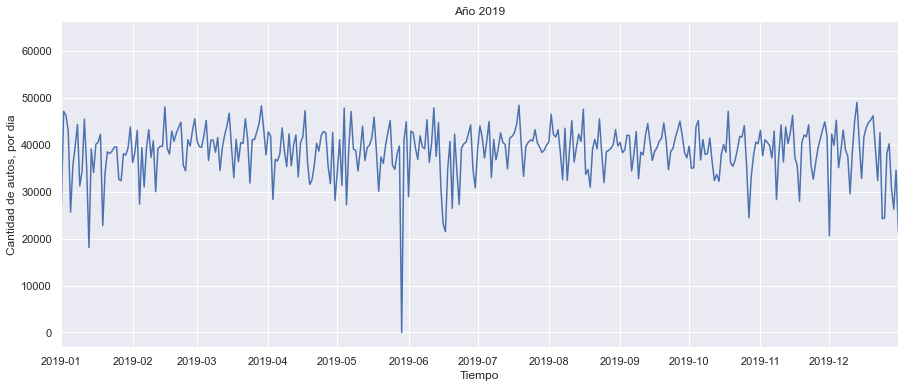

In [168]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2019,1,1), datetime.date(2019,12,31))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2019')
plt.show()
# En 2019 podemos visualizar 1 valor atípico el 29 de mayo:
# - El miércoles 29 de mayo la CGT anunció el quinto paro general de 24 horas en rechazo a las políticas económicas del gobierno de Mauricio Macri.

In [169]:
#Con el analisis realizado de los valores atípicos decidimos eliminar esos valores, ya que no aportan valor a nuestro data set.
#Porque son fechas de paros/huelgas donde la gente no circuló pero que no tienen estacionalidad en los años porque son fechas aisladas:
# - 2017-04-06, 2018-06-25, 2018-09-25, 2018-11-30, 2018-12-01, 2019-05-29
diario[diario.cantidad_pasos < 10000]

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [170]:
#Filtramos los 6 valores atípicos mostrados anteriormente
diario = diario[diario.cantidad_pasos > 10000]
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


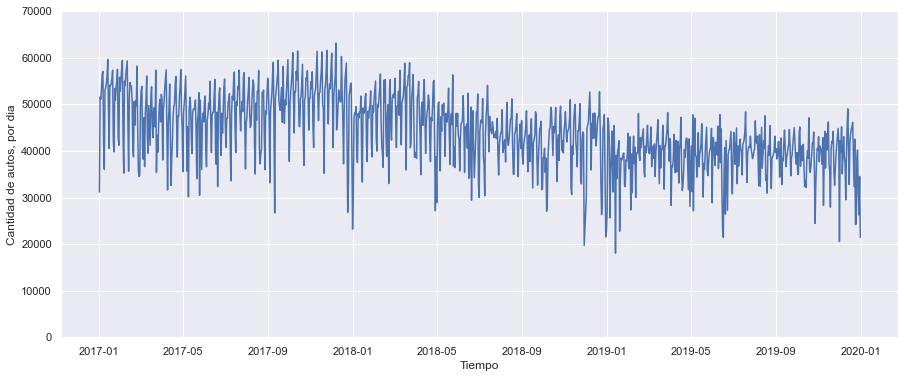

In [171]:
#Graficamos sin los valores atípicos
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylim(0,70000)
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [172]:
diario['dia'] = diario.index
diario['dia_de_la_semana'] = diario.dia.dt.dayofweek
diario

#0 lunes
#6 domingo

,cantidad_pasos,dia,dia_de_la_semana
fecha,,,
2017-01-01,31183,2017-01-01,6
2017-01-02,51568,2017-01-02,0
2017-01-03,51093,2017-01-03,1
2017-01-04,53332,2017-01-04,2
2017-01-05,56486,2017-01-05,3
...,...,...,...
2019-12-27,40182,2019-12-27,4
2019-12-28,30681,2019-12-28,5
2019-12-29,26259,2019-12-29,6


In [173]:
diario['semana_del_anio'] = diario.dia.dt.isocalendar().week
diario
#Por trimestre
#y = cantidad_pasos
#x = semana_del_anio
#agrupacion = dia_de_la_semana

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio
fecha,,,,
2017-01-01,31183,2017-01-01,6,52
2017-01-02,51568,2017-01-02,0,1
2017-01-03,51093,2017-01-03,1,1
2017-01-04,53332,2017-01-04,2,1
2017-01-05,56486,2017-01-05,3,1
...,...,...,...,...
2019-12-27,40182,2019-12-27,4,52
2019-12-28,30681,2019-12-28,5,52
2019-12-29,26259,2019-12-29,6,52


In [174]:
diario.reset_index(drop=True, inplace = True)

In [175]:
diario

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio
0,31183,2017-01-01,6,52
1,51568,2017-01-02,0,1
2,51093,2017-01-03,1,1
3,53332,2017-01-04,2,1
4,56486,2017-01-05,3,1
...,...,...,...,...
1084,40182,2019-12-27,4,52
1085,30681,2019-12-28,5,52
1086,26259,2019-12-29,6,52
1087,34523,2019-12-30,0,1


In [176]:
diario['semana_del_anio'].shape

(1089,)

In [177]:
diario['cantidad_pasos'].shape

(1089,)

In [178]:
diario['semana_del_anio'] = np.array(diario['semana_del_anio'], dtype=float)
diario['cantidad_pasos'] = np.array(diario['cantidad_pasos'], dtype=float)

(20000.0, 65000.0)

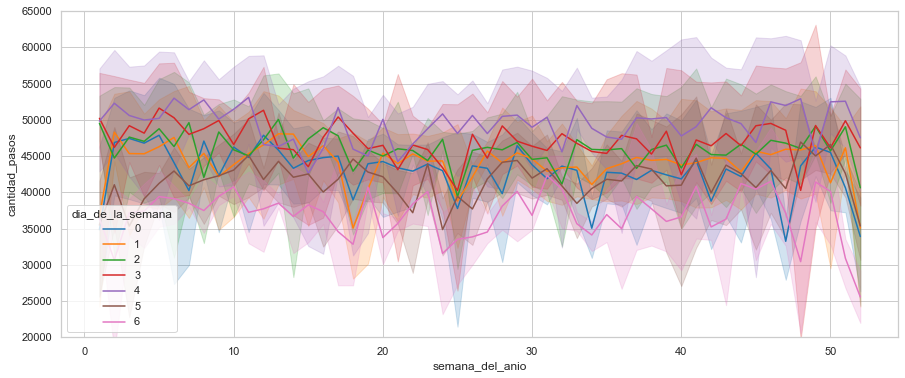

In [179]:
#Graficamos la cantidad de pasos según la semana del año, agrupado por día de la semana
sns.set(style="whitegrid")
color = sns.color_palette("tab10", 7)

plt.figure(figsize = (15,6))
sns.lineplot(x="semana_del_anio", y="cantidad_pasos",
             hue="dia_de_la_semana",
             data=diario, palette = color)
plt.ylim(20000,65000)
#0 -> Lunes / 6 -> Domingo

Del gráfico anterior podemos analizar:
* Los días **domingos** son los días con **menor** cantidad de pasos de la semana durante todo el año
* Los días **viernes y jueves** son los días con **mayor** cantidad de pasos de la semana
* Los días **sábados**, tiene mayor circulación que el domingo, pero no tanto como los días laborales de lunes a viernes.
* Los días **míercoles, lunes y martes** se mantienen dentro de los demás días.

In [180]:
#Creamos una nueva columna que solo tenga el año
diario['anio'] = diario.dia.dt.year

In [181]:
#Creamos una nueva columna que solo tenga el mes
diario['mes'] = diario.dia.dt.month
diario

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio,anio,mes
0,31183.0,2017-01-01,6,52.0,2017,1
1,51568.0,2017-01-02,0,1.0,2017,1
2,51093.0,2017-01-03,1,1.0,2017,1
3,53332.0,2017-01-04,2,1.0,2017,1
4,56486.0,2017-01-05,3,1.0,2017,1
...,...,...,...,...,...,...
1084,40182.0,2019-12-27,4,52.0,2019,12
1085,30681.0,2019-12-28,5,52.0,2019,12
1086,26259.0,2019-12-29,6,52.0,2019,12
1087,34523.0,2019-12-30,0,1.0,2019,12


(30000.0, 60000.0)

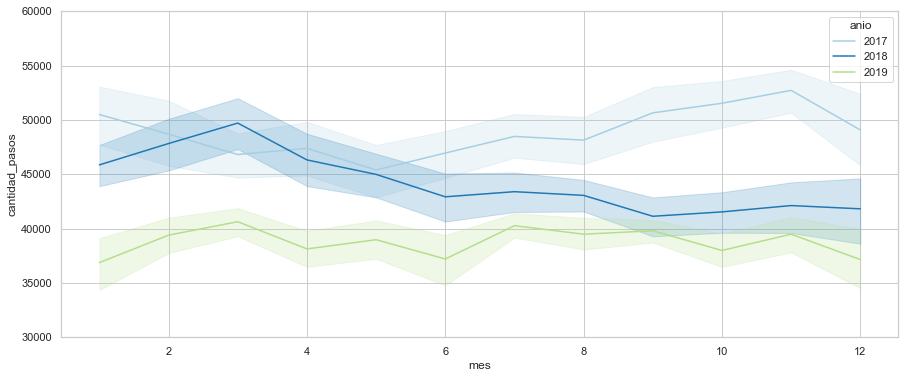

In [182]:
#Graficamos según el año la cantidad de pasos, agrupados por mes
sns.set(style="whitegrid")
color = sns.color_palette("Paired", 3)
plt.figure(figsize = (15,6))
sns.lineplot(x="mes", y="cantidad_pasos",
             hue="anio",
             data=diario, palette = color)
plt.ylim(30000,60000)

Podemos analizar que el año 2019 es el más estable en la cantidad de pasos en el transcurso de los meses, pero sin embargo tiene menor cantidad de pasos que 2017 y 2018.

Como consecuencia de la crisis que comenzó en abril del 2018 con la devaluación de la moneda, podemos visualizar que la cantidad de pasos tiene una **tendencia decreciente** que se mentiene durante todo el año 2019.
La tendencia se queda en el año 2019 dentro de un rango de 3500 hasta 4000 pasos por mes.

**2. MODELO MACHINE LEARNING**

Para comenzar necesitamos realizar una reducción de los datos, vamos a utilizar una función para pasar de series de tiempo a una tabla.
Esto es necesario para crear nuestro modelo de machine learning.

In [183]:
diario.head()

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio,anio,mes
0,31183.0,2017-01-01,6,52.0,2017,1
1,51568.0,2017-01-02,0,1.0,2017,1
2,51093.0,2017-01-03,1,1.0,2017,1
3,53332.0,2017-01-04,2,1.0,2017,1
4,56486.0,2017-01-05,3,1.0,2017,1


In [184]:
#REDUCCION: función pasamos de series de tiempo a una tabla 
#- esto lo necesitamos para crear nuestro Modelo de Machine Learning

def split_into_train_test(data, window_size, horizon):
    """
    Splits the series into train and test sets. Each step takes multiple points as inputs
    :param data: an individual TS
    :param window_size: number of input points for the forecast
    :param horizon: number of out of sample points
    :return:
    """
    train, test = data[:-horizon], data[-(horizon + window_size):]
    X_train, y_train = train[:-1], np.roll(train, -window_size)[:-window_size]
    X_test, y_test = test[:-1], np.roll(test, -window_size)[:-window_size]

    # Hago el reshape
    X_train = np.reshape(X_train, (-1, 1))
    X_test = np.reshape(X_test, (-1, 1))
    temp_test = np.roll(X_test, -1)
    temp_train = np.roll(X_train, -1)
    for x in range(1, window_size):
        X_train = np.concatenate((X_train[:-1], temp_train[:-1]), 1)
        X_test = np.concatenate((X_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return X_train, y_train, X_test, y_test

In [185]:
diario.cantidad_pasos.values

array([31183., 51568., 51093., ..., 26259., 34523., 21447.])

Hacemos un train-test-split de nuestros datos, definiendo:
- ventana de tiempo: numero de tiempo en pasado que voy a usar para predecir (look_back)
- horizonte: periodo de tiempo predicho
- datos: cantidad de pasos

Nuestro modelo utiliza para predecir la información del año anterior (365 días antes).

In [186]:
ventana = 365    #un año(365 dias)
horizonte = 90   #trimestre
serie_tiempo = diario.cantidad_pasos.values
X_train, y_train, X_test, y_test = split_into_train_test(serie_tiempo, ventana, horizonte)

In [187]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(634, 365) (634,)
(90, 365) (90,)


In [188]:
#Creamos y entrenamos nuestro modelo

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

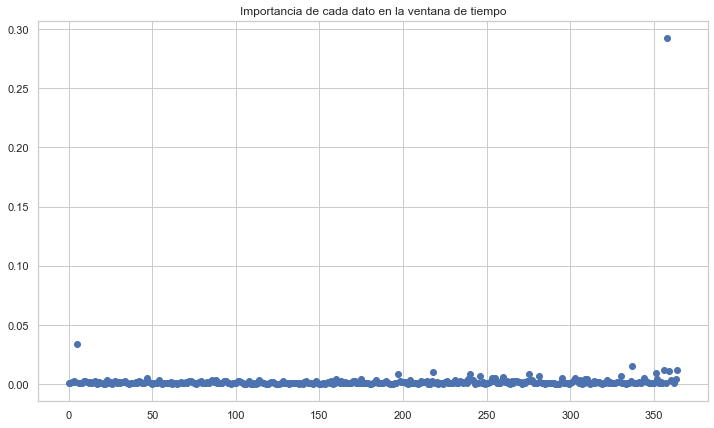

In [189]:
#Graficamos la importancia de cada dato de nuestra ventana

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.title('Importancia de cada dato en la ventana de tiempo')
plt.show()

#Podemos analizar que los datos con mayor importancia son:
#x0 -> hace un año
#x364 -> ayer

# "Ayer" es el dato que tiene mayor importancia en nuestra ventana de tiempo.
# Y "un año atrás" tiene un poco más importancia que el resto de los datos.
# Por lo que los datos más importantes son a fin de año y comienzo de año

**ONE STEP**

In [190]:
#y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [191]:
#Calculamos el error 
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1878.1479238587133
Error en Test: 6052.046016065605


In [192]:
senial = diario.cantidad_pasos
senial

0       31183.0
1       51568.0
2       51093.0
3       53332.0
4       56486.0
         ...   
1084    40182.0
1085    30681.0
1086    26259.0
1087    34523.0
1088    21447.0
Name: cantidad_pasos, Length: 1089, dtype: float64

In [193]:
look_back = ventana

N_train = len(y_train)
N_test = len(y_test)

N_total = N_train + N_test

length_total = N_train + N_test + look_back

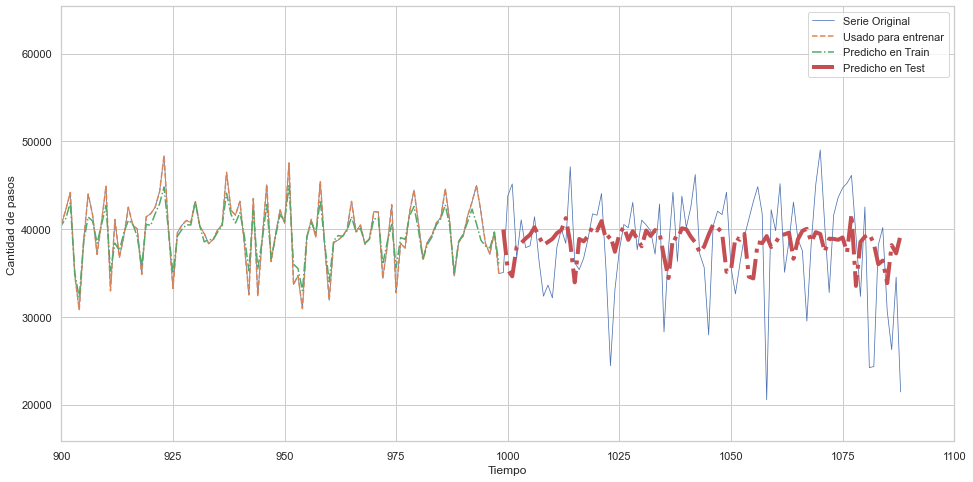

In [194]:
#Graficamos nuestra predicción

plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(900,1100)
plt.show()

**Optimizar hiperparametros con Grid Search**

In [195]:
#Volvemos a entrenar nuestro modelo eligiendo los mejores hiperparametros con GridSearchfrom sklearn.model_selection import GridSearchCV

#GRID SEARCH
param_grid = {'n_estimators':[10,50,100],
              'max_depth':[5,10,14],
              'max_features': ['sqrt2', 'log2',2,8],
              'min_samples_leaf':[3,5,10],
              'min_samples_split':[6,8,10],
               'max_leaf_nodes':[10,30,None]} 
#model = RandomForestRegressor(random_state=42)
#gs = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error',n_jobs=5)
#gs.fit(X_train,y_train)

#print(gs.best_params_)
#print(-gs.best_score_)

In [196]:
rfr = RandomForestRegressor(max_depth=10,max_features='log2',min_samples_leaf=3,
                            min_samples_split=6,max_leaf_nodes=None,n_estimators=100,random_state=42,n_jobs=4).fit(X_train,y_train)

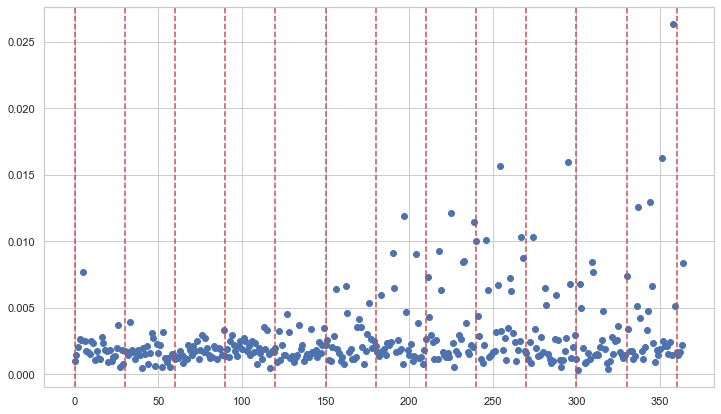

In [197]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rfr.feature_importances_.size),rfr.feature_importances_)
for x in np.arange(13)*30:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

#Podemos analizar que los puntos del gráfico anterior mantienen la misma importancia. 
#Pero los demás puntos incrementan su importancia a medida que los días del año van incrementando.
#Por lo que para predecir son más importantes los días dentro de un rango de 150 días a 365.
#Siendo los que en los últimos 6 meses del año la importancia de los datos aumenta para la predicción futura.

In [198]:
#Predicción

#y_pred = rf.predict(X)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [199]:
#Calculamos el error 
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2860.738187434356
Error en Test: 5818.637668815879


In [200]:
senial = diario.cantidad_pasos
senial

0       31183.0
1       51568.0
2       51093.0
3       53332.0
4       56486.0
         ...   
1084    40182.0
1085    30681.0
1086    26259.0
1087    34523.0
1088    21447.0
Name: cantidad_pasos, Length: 1089, dtype: float64

In [201]:
look_back = ventana

N_train = len(y_train)
N_test = len(y_test)

N_total = N_train + N_test

length_total = N_train + N_test + look_back

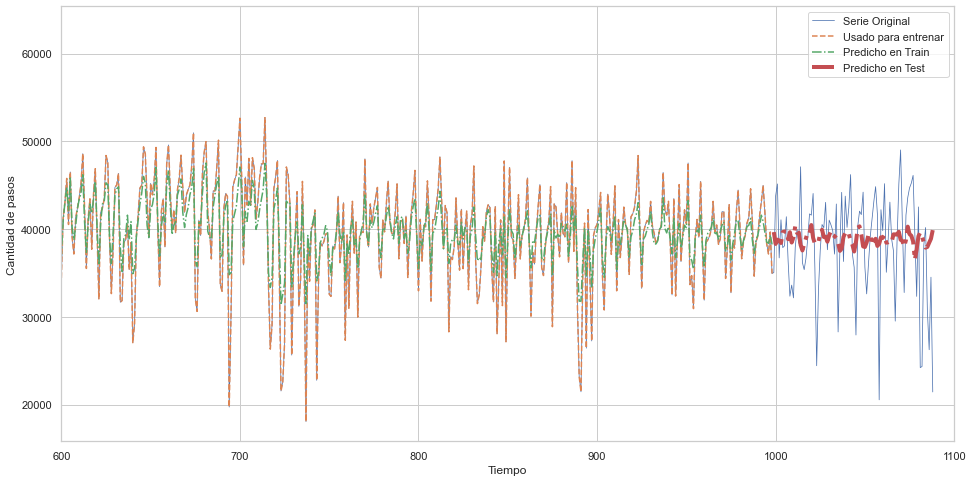

In [202]:
#Graficamos nuestra predicción
# azul = dato real
# rojo = nosotros predecimos
# error = azul - rojo

plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(600,1100)
plt.show()

**MULTI-STEP**

In [203]:
#Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

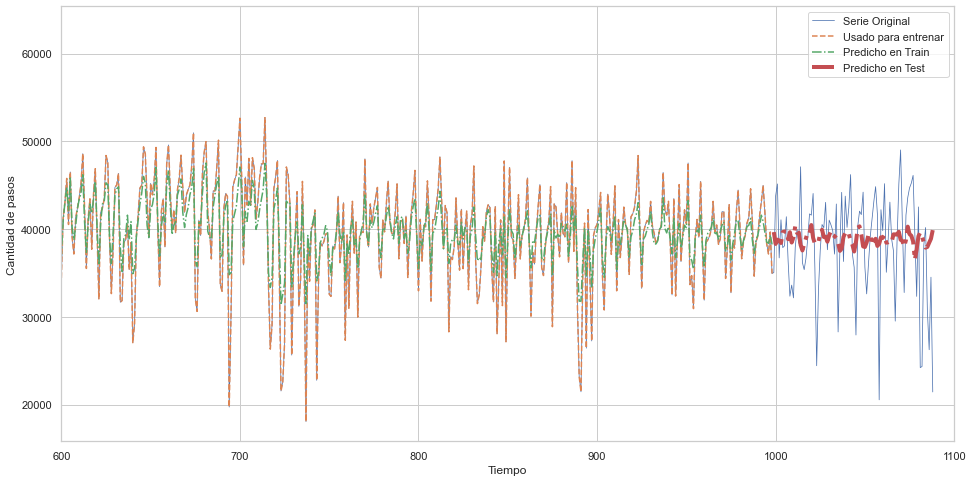

In [204]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(600,1100)
plt.show()

In [205]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 6222.390419810987


**BENCHMARK**

Como modelo de benchmark vamos a utilizar el valor de la fecha anterior.
Comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [206]:
X_train.size

231410

In [207]:
y_train.size

634

In [208]:
last = y_train[-1]

In [209]:
type(y_test)

numpy.ndarray

In [210]:
y_test.shape

(90,)

In [211]:
y_test_pred_benchmark = np.ones(shape = y_test.shape) * last
y_test_pred_benchmark

array([34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943.])

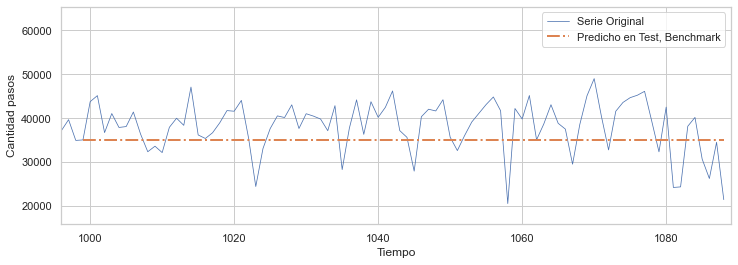

In [212]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
#plt.xlim(senial.index[N_train+look_back], senial.index[length_total-1])
plt.xlim(996,1089)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos')
plt.legend()
plt.show()

In [213]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 6674.689455947246


**CONCLUSIONES**

**ONE STEP:**
- Error en Train: 1878.1479238587133
- Error en Test: 6052.046016065605

**ONE STEP CON OPTIMIZACION DE HIPERPARAMETROS:**
- Error en Train: 2860.738187434356
- Error en Test: 5818.63766881588

**MULTI STEP:**
- Error en Train: 6222.390419810987

**BENCHMARK:**
- Error en Train: 6674.689455947246

Podemos analizar que el modelo que tiene mayor Error en Train es nuestro modelo de Benchmark que copia el valor de la fecha anterior para predecir. 

Comparando los modelos de One Step con Multi Step, podemos analizar que el modelo Multi Step es mucho peor en Train, pero es mejor que nuestro benchmark.

Y comparando nuestros modelos de One Step, el modelo con optimización de hiperparametros es más robusto ya que la diferencia entre Train y Test es menor, que la diferencia del primer modelo de One Step sin optimización de hiperparametros.


**INVESTIGACION**
Nuevas preguntas para implementar con nuestro modelo:
1. Influye en la predicción la hora de los días? Hay horas picos en los días de la semana? 
 - Por ejemplo: los días laborales (lunes a viernes), la hora que la gente entra a trabajar 8am es horario pico? Y la hora que la gente sale de trabajar 18hs, también es horario pico? Por lo que la cantidad de pasos es mayor en esos horarios? Y en el resto de las horas del día es menor?

2. Influye el sentido de la circulación en la predicción? 
 -  Por ejemplo: a la mañana la gente circula más hacia el Centro para ir a trabajar en horario laboral de Lunes a Viernes. Y luego de la jornada laboral, la cantidad de pasos aumenta a Provincia (porque la gente vuelve a sus casas)? 

Para llevar a cabo estas preguntas podríamos filtrar nuestros datos según las horas del día y el sentido de circulación.  
Graficando de esta manera por las horas del día y agrupando según el sentido de circulación.  
Así podriamos analizar si los **horas** de comienzos/finales de las jornadas laborales de Lunes a Viernes es donde hay mayor cantidad de pasos.  
Y también podríamos analizar:  
- Si al comienzo de la jornada laboral (primeras horas del día) el sentido a **Centro** tiene mayor cantidad de pasos.  
- Y si al final de la jornada laboral el sentido hacia **Provincia** tiene mayor cantidad de pasos.

De esta manera, con este nuevo dataset filtrado, volveríamos a entrenar nuestros modelos (One Step, One Step con optimización de hiperparámetros, Multi Step y nuestro Benchmark).

Luego de entrenar nuestros modelos, compararíamos nuestras predicciones y analizaríamos si en las predicciones mejoran o empeoran con el nuevo planteo de los datos.
Podríamos así concluir si el sentido de circulación y el horario de circulación tiene mayor o menor influencia en nuestras predicciones.